In [3]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
coordinates

[(34.42631693050494, -17.337599545487933),
 (-40.584972441881625, 53.76318651045793),
 (-15.133467146292986, 159.53523768101803),
 (-3.0176245283016954, -104.05493036336917),
 (10.026507970673919, -153.03754717078593),
 (48.42035323900865, 146.07051704151985),
 (59.860449065764215, -36.4466018115983),
 (77.16303674075345, -153.71756555282596),
 (28.049646333606262, -116.22768357280316),
 (-87.64100558953241, -130.79568682373636),
 (-58.29804981537595, 39.32236427513757),
 (-89.39737700242776, 85.71833800413629),
 (-75.1810547082212, 78.39929477640959),
 (75.27194158266818, -139.96804987308803),
 (32.25964177486709, 113.66507730528463),
 (-87.45715904446742, 175.51776112628687),
 (47.87971877224928, 56.43529589360364),
 (83.68856574659773, -65.59378136966515),
 (68.94119835848574, -147.11012531063275),
 (47.45095530204202, -2.90787624305554),
 (53.30671992780492, -113.30400592282159),
 (-56.210290750834886, 76.21147530757025),
 (25.475050446091046, 171.17751950493363),
 (87.272785848010

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [9]:
cities

['camacha',
 'taolanaro',
 'kirakira',
 'puerto ayora',
 'hilo',
 'vostok',
 'tasiilaq',
 'barrow',
 'guerrero negro',
 'rikitea',
 'port alfred',
 'busselton',
 'aklavik',
 'minggang',
 'bluff',
 'shubarshi',
 'narsaq',
 'college',
 'auray',
 'beaumont',
 'souillac',
 'butaritari',
 'tuktoyaktuk',
 'jamestown',
 'punta arenas',
 'nanortalik',
 'mataura',
 'vestmannaeyjar',
 'ushuaia',
 'chuy',
 'ondjiva',
 'grindavik',
 'toliary',
 'georgetown',
 'dikson',
 'illoqqortoormiut',
 'bethel',
 'smolenka',
 'ushirombo',
 'trinidad',
 'provideniya',
 'arraial do cabo',
 'tadine',
 'tabou',
 'pangnirtung',
 'sahuaripa',
 'nederland',
 'bhuj',
 'ahipara',
 'albany',
 'nizhneyansk',
 'laguna',
 'alofi',
 'le vauclin',
 'chokurdakh',
 'otane',
 'zhigansk',
 'tuatapere',
 'genc',
 'thompson',
 'maldonado',
 'hamilton',
 'darhan',
 'new norfolk',
 'mopti',
 'mozarlandia',
 'norman wells',
 'bambous virieux',
 'bilibino',
 'atar',
 'burkhala',
 'tokmak',
 'pringsewu',
 'jacmel',
 'sindor',
 'airai'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a223963a9ff2a5739e2391ad3040da99


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Import the datetime module from the datetime library.
from datetime import datetime

Beginning Data Retrieval     
-----------------------------


In [13]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
set_count = 1
record_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camacha
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kirakira
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | vostok
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | minggang
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | shubarshi
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | auray
Processing Record 20 of Set 1 | beaumont
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | butaritari
Processing Record 23 

Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | rocha
Processing Record 47 of Set 4 | chicama
Processing Record 48 of Set 4 | taburi
City not found. Skipping...
Processing Record 49 of Set 4 | narasannapeta
Processing Record 50 of Set 4 | ziri
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | vitoria da conquista
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | nikolskoye
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | saint-francois
Processing Record 10 of Set 5 | zhangye
Processing Record 11 of Set 5 | roma
Processing Record 12 of Set 5 | naze
Processing Record 13 of Set 5 | havelock
Processing Record 14 of Set 5 | necochea
Processing Record 15 of Set 5 | mandalgarh
Processing Record 16 of Set 5 | 

Processing Record 34 of Set 8 | umm kaddadah
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | acajutla
Processing Record 37 of Set 8 | mirpur sakro
Processing Record 38 of Set 8 | mandalgovi
Processing Record 39 of Set 8 | nicholasville
Processing Record 40 of Set 8 | thano bula khan
City not found. Skipping...
Processing Record 41 of Set 8 | vilhena
Processing Record 42 of Set 8 | marzuq
Processing Record 43 of Set 8 | coruripe
Processing Record 44 of Set 8 | amderma
City not found. Skipping...
Processing Record 45 of Set 8 | valverde del camino
Processing Record 46 of Set 8 | rafai
Processing Record 47 of Set 8 | coquimbo
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | ancud
Processing Record 50 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 9 | progreso
Processing Record 2 of Set 9 | launceston
Processing Record 3 of Set 9 | zhezkazgan
Processing Record 4 of Set 9 | snasa
Processing Record 5 of Set 9 | co

City not found. Skipping...
Processing Record 22 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 12 | kennewick
Processing Record 24 of Set 12 | lokosovo
Processing Record 25 of Set 12 | ixtapa
Processing Record 26 of Set 12 | zarichne
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | paka
Processing Record 29 of Set 12 | diapaga
Processing Record 30 of Set 12 | gariaband
Processing Record 31 of Set 12 | eureka
Processing Record 32 of Set 12 | kodinsk
Processing Record 33 of Set 12 | masuguru
Processing Record 34 of Set 12 | aneza
Processing Record 35 of Set 12 | goya
Processing Record 36 of Set 12 | hami
Processing Record 37 of Set 12 | saint-pierre
Processing Record 38 of Set 12 | junin
Processing Record 39 of Set 12 | medina
Processing Record 40 of Set 12 | biltine
Processing Record 41 of Set 12 | bardiyah
Processing Record 42 of Set 12 | omboue
Processing Record 43 of Set 12 | bayan
Processing Record 44 of Set 12 | keffi
Processing Rec

In [14]:
len(city_data)

563

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camacha,33.08,-16.33,73.40,88,40,10.29,PT,2020-08-21 00:38:23
1,Kirakira,-10.45,161.92,83.48,74,14,4.21,SB,2020-08-21 00:38:23
2,Puerto Ayora,-0.74,-90.35,66.00,88,65,8.01,EC,2020-08-21 00:38:23
3,Hilo,19.73,-155.09,82.40,65,90,8.05,US,2020-08-21 00:38:23
4,Vostok,46.49,135.88,63.16,53,0,7.81,RU,2020-08-21 00:38:23
5,Tasiilaq,65.61,-37.64,42.80,75,0,2.24,GL,2020-08-21 00:38:23
6,Barrow,71.29,-156.79,46.40,87,90,8.05,US,2020-08-21 00:38:23
7,Guerrero Negro,27.98,-114.06,81.09,57,100,13.98,MX,2020-08-21 00:38:23
8,Rikitea,-23.12,-134.97,66.76,80,100,26.35,PF,2020-08-21 00:38:23
9,Port Alfred,-33.59,26.89,58.26,77,100,9.44,ZA,2020-08-21 00:38:23


In [16]:
new_column_order = ["City", "Country","Date",'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camacha,PT,2020-08-21 00:38:23,33.08,-16.33,73.40,88,40,10.29
1,Kirakira,SB,2020-08-21 00:38:23,-10.45,161.92,83.48,74,14,4.21
2,Puerto Ayora,EC,2020-08-21 00:38:23,-0.74,-90.35,66.00,88,65,8.01
3,Hilo,US,2020-08-21 00:38:23,19.73,-155.09,82.40,65,90,8.05
4,Vostok,RU,2020-08-21 00:38:23,46.49,135.88,63.16,53,0,7.81
...,...,...,...,...,...,...,...,...,...
558,Ust-Kuyga,RU,2020-08-21 00:38:54,70.02,135.60,41.16,80,100,4.18
559,Tutoia,BR,2020-08-21 00:38:54,-2.76,-42.27,79.02,81,25,11.68
560,Benghazi,LY,2020-08-21 00:38:54,32.12,20.07,78.78,73,0,17.02
561,Cayenne,GF,2020-08-21 00:37:03,4.93,-52.33,78.80,88,0,1.12


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")



In [18]:
# Extract relevant fields form the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597970652.716304

In [27]:
lats

0      33.08
1     -10.45
2      -0.74
3      19.73
4      46.49
       ...  
558    70.02
559    -2.76
560    32.12
561     4.93
562     6.04
Name: Lat, Length: 563, dtype: float64

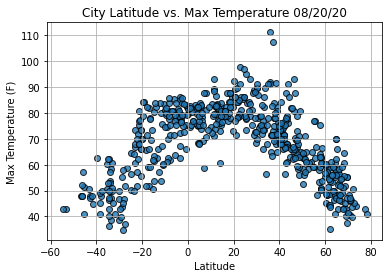

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

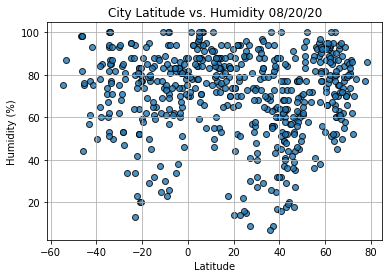

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

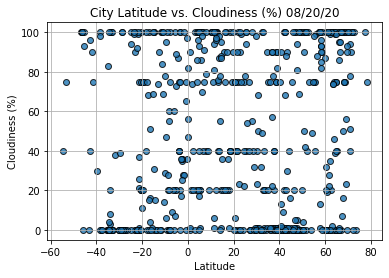

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

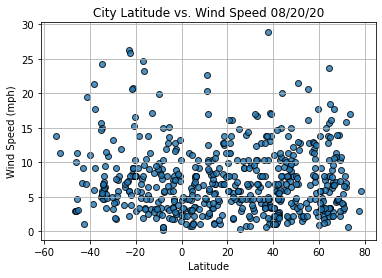

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()